In [1]:
#Importing all the necessary libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the first dataset
df_a=pd.read_csv(r"C:\Users\nehan\Campus_Recruitment_CSV\raw_datasets\test.csv")
df_b=pd.read_csv(r"C:\Users\nehan\Campus_Recruitment_CSV\raw_datasets\train.csv")
df_c=pd.read_csv(r"C:\Users\nehan\Campus_Recruitment_CSV\raw_datasets\validation.csv")
df_d=pd.concat([df_a,df_b],ignore_index=True)
df1=pd.concat([df_d,df_c],ignore_index=True)
df1.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,2,3,3,86,4.1,Yes,Yes,69,86,NotPlaced
1,8.4,2,3,0,83,4.4,Yes,Yes,85,82,Placed
2,8.0,2,3,2,90,4.2,Yes,Yes,73,87,Placed
3,8.8,2,3,2,90,4.8,Yes,Yes,84,88,Placed
4,7.5,1,1,0,70,4.3,No,Yes,55,71,NotPlaced


In [3]:
#Chcking if the data set has any null values
df1.isnull().values.any()

False

In [4]:
#Creating a new column to match the attribute it with the other dataset's work_experience
def create(internships):  
    if internships > 0:  
        return "Yes"  
    else:  
        return "No"  
df1['work_experience'] = df1['Internships'].apply(create)
df1=df1[['CGPA','SSC_Marks','HSC_Marks','AptitudeTestScore','work_experience','PlacementStatus']]
df1.head(6)

,CGPA,SSC_Marks,HSC_Marks,AptitudeTestScore,work_experience,PlacementStatus
0,7.5,69,86,86,Yes,NotPlaced
1,8.4,85,82,83,Yes,Placed
2,8.0,73,87,90,Yes,Placed
3,8.8,84,88,90,Yes,Placed
4,7.5,55,71,70,Yes,NotPlaced
5,8.5,57,66,77,Yes,NotPlaced


In [5]:
#Applying the z-score normalization on CGPA
mean_gpa=df1['CGPA'].mean()
sd1=df1['CGPA'].std()
df1['CGPA']=(df1['CGPA']-mean_gpa)/sd1
df1.head()

,CGPA,SSC_Marks,HSC_Marks,AptitudeTestScore,work_experience,PlacementStatus
0,-0.309327,69,86,86,Yes,NotPlaced
1,1.096634,85,82,83,Yes,Placed
2,0.471763,73,87,90,Yes,Placed
3,1.721506,84,88,90,Yes,Placed
4,-0.309327,55,71,70,Yes,NotPlaced


In [6]:
#Applying the Z-score normalization on ssc_marks,hsc_marks and AptitudeTestScore
mean_ssc=df1['SSC_Marks'].mean()
sd_ssc=df1['SSC_Marks'].std()
df1['SSC_Marks']=(df1['SSC_Marks']-mean_ssc)/sd_ssc
mean_hsc=df1['HSC_Marks'].mean()
sd_hsc=df1['HSC_Marks'].std()
df1['HSC_Marks']=(df1['HSC_Marks']-mean_hsc)/sd_hsc
mean_apt=df1['AptitudeTestScore'].mean()
sd_apt=df1['AptitudeTestScore'].std()
df1['AptitudeTestScore']=(df1['AptitudeTestScore']-mean_apt)/sd_apt
#changing the categorial attribute to numeric
def help(data):
    if(data=="Yes"): 
        return 1
    else:
        return 0
df1['work_experience']=df1['work_experience'].apply(help)
df1.head()

,CGPA,SSC_Marks,HSC_Marks,AptitudeTestScore,work_experience,PlacementStatus
0,-0.309327,-0.015282,1.289138,0.802709,1,NotPlaced
1,1.096634,1.518687,0.840684,0.435061,1,Placed
2,0.471763,0.368210,1.401252,1.292905,1,Placed
3,1.721506,1.422814,1.513365,1.292905,1,Placed
4,-0.309327,-1.357505,-0.392566,-1.158076,1,NotPlaced


In [7]:
#Loading the second dataset
df2=pd.read_csv(r"C:\Users\nehan\Downloads\job_placement\Job_Placement_Data.csv")
df2.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [8]:
#Applying the z-score normalization on degree_percentage( i.e. CGPA),ssc_percentage,hsc_percentage,emp_test_percentage(AptitudeTestScore)
df2=df2[(df2['ssc_board']=="Central") & (df2['hsc_board']=="Central")]
mean_ssc=df2['ssc_percentage'].mean()
sd_ssc=df2['ssc_percentage'].std()
df2['ssc_percentage']=(df2['ssc_percentage']-mean_ssc)/sd_ssc
mean_hsc=df2['hsc_percentage'].mean()
sd_hsc=df2['hsc_percentage'].std();
df2['hsc_percentage']=(df2['hsc_percentage']-mean_hsc)/sd_hsc
mean_apt=df2['emp_test_percentage'].mean()
sd_apt=df2['emp_test_percentage'].std()
df2['emp_test_percentage']=(df2['emp_test_percentage']-mean_apt)/sd_apt
df2['degree_percentage']=((df2['degree_percentage']-df2['degree_percentage'].min())/(df2['degree_percentage'].max()-df2['degree_percentage'].min()))*100
mean_gpa=df2['degree_percentage'].mean()
sd_gpa=df2['degree_percentage'].std()
df2['degree_percentage']=(df2['degree_percentage']-mean_gpa)/sd_gpa
df2['work_experience']=df2['work_experience'].apply(help)
df2=df2[['degree_percentage','ssc_percentage','hsc_percentage','emp_test_percentage','work_experience','status']]
df2.head()

,degree_percentage,ssc_percentage,hsc_percentage,emp_test_percentage,work_experience,status
2,-0.231172,-0.167830,0.085921,0.259924,0,Placed
3,-2.023290,-1.055054,-1.666052,-0.463800,0,Not Placed
4,1.157720,1.882644,0.699111,2.012945,0,Placed
7,0.067515,1.508038,-0.352073,-0.383386,1,Placed
8,0.963574,0.620814,1.290402,1.573886,0,Placed


In [9]:
#Renaming the columns so that the dataframes can be merged
df2.columns=['CGPA','SSC_Marks','HSC_Marks','AptitudeTestScore','work_experience','PlacementStatus']

In [10]:
df2.head()

,CGPA,SSC_Marks,HSC_Marks,AptitudeTestScore,work_experience,PlacementStatus
2,-0.231172,-0.167830,0.085921,0.259924,0,Placed
3,-2.023290,-1.055054,-1.666052,-0.463800,0,Not Placed
4,1.157720,1.882644,0.699111,2.012945,0,Placed
7,0.067515,1.508038,-0.352073,-0.383386,1,Placed
8,0.963574,0.620814,1.290402,1.573886,0,Placed


In [11]:
#merging the dataframes to a single data fram
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df.head()

,CGPA,SSC_Marks,HSC_Marks,AptitudeTestScore,work_experience,PlacementStatus
0,-0.309327,-0.015282,1.289138,0.802709,1,NotPlaced
1,1.096634,1.518687,0.840684,0.435061,1,Placed
2,0.471763,0.368210,1.401252,1.292905,1,Placed
3,1.721506,1.422814,1.513365,1.292905,1,Placed
4,-0.309327,-1.357505,-0.392566,-1.158076,1,NotPlaced


In [12]:
df['PlacementStatus'].unique()

array(['NotPlaced', 'Placed', 'Not Placed'], dtype=object)

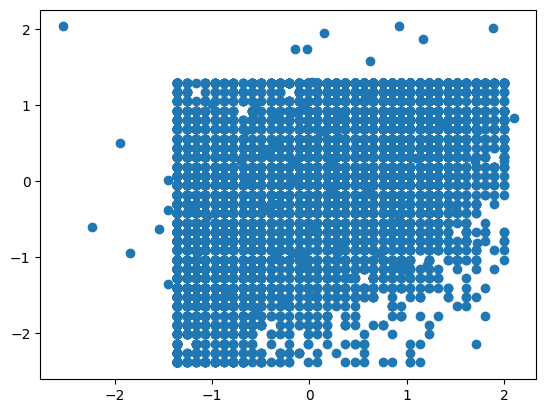

In [13]:
plt.scatter(df['SSC_Marks'],df['AptitudeTestScore'])

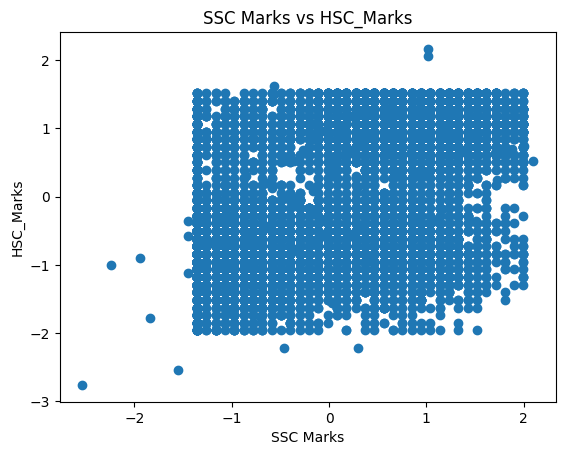

In [14]:
plt.scatter(df['SSC_Marks'],df['HSC_Marks'])
plt.xlabel('SSC Marks')
plt.ylabel('HSC_Marks')
plt.title('SSC Marks vs HSC_Marks')
plt.show()

<Axes: >

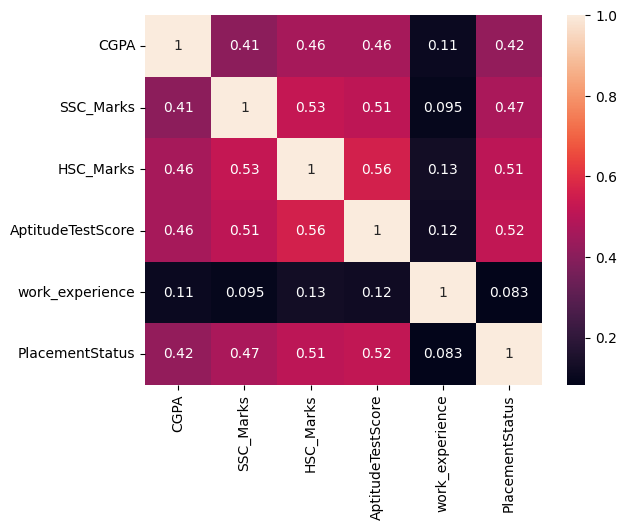

In [15]:
#Converting the categorical attribute to numerical.
def to_numeric(data):
    if(data=="Placed"):
        return 1
    else:
        return 0
df['PlacementStatus']=df['PlacementStatus'].apply(to_numeric)
#Ploting the heat map of correlation matrix for data reduction
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

In [16]:
df.head()

,CGPA,SSC_Marks,HSC_Marks,AptitudeTestScore,work_experience,PlacementStatus
0,-0.309327,-0.015282,1.289138,0.802709,1,0
1,1.096634,1.518687,0.840684,0.435061,1,1
2,0.471763,0.368210,1.401252,1.292905,1,1
3,1.721506,1.422814,1.513365,1.292905,1,1
4,-0.309327,-1.357505,-0.392566,-1.158076,1,0


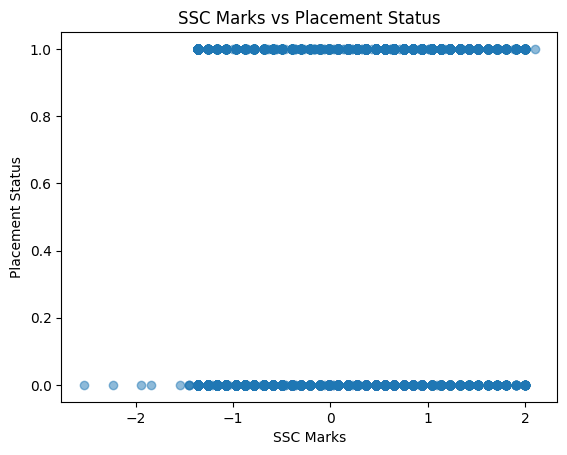

In [17]:
plt.scatter(df['SSC_Marks'], df['PlacementStatus'], alpha=0.5)
plt.xlabel('SSC Marks')
plt.ylabel('Placement Status')
plt.title('SSC Marks vs Placement Status')
plt.show()

In [18]:
#Making a train test split of 80:20 ratio
from sklearn.model_selection import train_test_split
output=df['PlacementStatus']
df.drop(columns=['PlacementStatus'],inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, output, test_size=0.2)

In [19]:
#importing all the necessary algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
models = [
    
    # Naive Bayes model (good for small datasets, assumes independence between features)
    GaussianNB(),
    
    # Decision Tree model (simple and interpretable, prone to overfitting)
    DecisionTreeClassifier(random_state=42),

    # Random Forest (ensemble of decision trees, reduces overfitting and improves accuracy)
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Logistic Regression (linear model, great for binary classification problems)
    LogisticRegression(random_state=50, max_iter=1000),
   
    # AdaBoost (boosting algorithm, combines weak learners to create a strong classifier)
    AdaBoostClassifier(random_state=45),

    # XGBoost (powerful gradient boosting algorithm, handles missing data well and has regularization)
    XGBClassifier(random_state=42),

    # LightGBM (another gradient boosting model optimized for speed and performance)
    LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1, verbose=50),
    
    # K-Nearest Neighbors (instance-based learning, predicts class based on closest neighbors)
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),   

    # Gradient Boosting (boosting technique that builds models sequentially to reduce errors)
    GradientBoostingClassifier(random_state=42)]

In [21]:
predictions = {}
scores = {}

for i, model in enumerate(models):
    
    # Train the model on the training dataset
    model.fit(X_train, y_train)
   
    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
   
    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))   

    # Make predictions
    y_pred = model.predict(X_test)
    predictions[type(model).__name__] = y_pred

    # Calculate the accuracy of the predictions
    score = accuracy_score(y_test, y_pred)
    scores[type(model).__name__] = score

    # Print the model name and the accuracies on the training and testing datasets
    print("-----------------")
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Prediction Accuracy: {score}")
    print("-----------------")
    print()

# Print the model scores
print("Model Scores")
for model_name, score in scores.items():
    print()
    print(f"{model_name}: {score}")

-----------------
Model 1: GaussianNB
Training Accuracy: 0.7774469668775587
Testing Accuracy: 0.7941468253968254
Prediction Accuracy: 0.7941468253968254
-----------------

-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9915643220444114
Testing Accuracy: 0.6964285714285714
Prediction Accuracy: 0.6964285714285714
-----------------

-----------------
Model 3: RandomForestClassifier
Training Accuracy: 0.9915643220444114
Testing Accuracy: 0.7648809523809523
Prediction Accuracy: 0.7648809523809523
-----------------

-----------------
Model 4: LogisticRegression
Training Accuracy: 0.7822850762932638
Testing Accuracy: 0.7991071428571429
Prediction Accuracy: 0.7991071428571429
-----------------



C:\Users\nehan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.7860066989207294
Testing Accuracy: 0.8015873015873016
Prediction Accuracy: 0.8015873015873016
-----------------

-----------------
Model 6: XGBClassifier
Training Accuracy: 0.8866145639498821
Testing Accuracy: 0.7817460317460317
Prediction Accuracy: 0.7817460317460317
-----------------

-----------------
Model 7: LGBMClassifier
Training Accuracy: 0.8103213000868379
Testing Accuracy: 0.7911706349206349
Prediction Accuracy: 0.7911706349206349
-----------------

-----------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.817764545341769
Testing Accuracy: 0.7663690476190477
Prediction Accuracy: 0.7663690476190477
-----------------

-----------------
Model 9: GradientBoostingClassifier
Training Accuracy: 0.7936980523508249
Testing Accuracy: 0.7941468253968254
Prediction Accuracy: 0.7941468253968254
-----------------

Model Scores

GaussianNB: 0.7941468253968254

DecisionTreeClassifier: 0.6964285714285714

RandomFore